In [3]:
!git clone https://github.com/0nur0duncu/NeuroGraphT

Cloning into 'NeuroGraphT'...
remote: Enumerating objects: 83, done.
remote: Counting objects: 100% (83/83), done.
remote: Compressing objects: 100% (48/48), done.
remote: Total 83 (delta 37), reused 75 (delta 29), pack-reused 0 (from 0)
Receiving objects: 100% (83/83), 253.74 KiB | 3.48 MiB/s, done.
Resolving deltas: 100% (37/37), done.


In [4]:
%cd NeuroGraphT

/content/NeuroGraphT


In [5]:
# Gerekli kütüphaneleri yükle
!pip install -r requirements.txt -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 65.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 96.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 kB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.6/14.6 MB 142.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 10.0 MB/s eta 0:00:00


In [7]:
# Sleep-EDF veri setini indir (otomatik)
from data.download import ensure_dataset
data_path = ensure_dataset(verbose=True)
print(f"Veri seti: {data_path}")

Veri seti indiriliyor: /content/dataset/sleep-edfx


İndiriliyor: 100%|██████████| 399/399 [02:04<00:00,  3.21it/s]


✓ İndirme tamamlandı: /content/dataset/sleep-edfx
Dosya yapısı:
  sleep-telemetry/ST7132JR-Hypnogram.edf
  sleep-telemetry/ST7131J0-PSG.edf
  sleep-telemetry/ST7101J0-PSG.edf
  sleep-telemetry/ST7091J0-PSG.edf
  sleep-telemetry/ST7131JR-Hypnogram.edf
  sleep-telemetry/ST7211JJ-Hypnogram.edf
  sleep-telemetry/ST7021JM-Hypnogram.edf
  sleep-telemetry/ST7191JR-Hypnogram.edf
  sleep-telemetry/ST7242JO-Hypnogram.edf
  sleep-telemetry/ST7092J0-PSG.edf
  sleep-telemetry/ST7152J0-PSG.edf
  sleep-telemetry/ST7211J0-PSG.edf
  sleep-telemetry/ST7151JA-Hypnogram.edf
  sleep-telemetry/ST7241JO-Hypnogram.edf
  sleep-telemetry/ST7122J0-PSG.edf
  sleep-telemetry/ST7011JP-Hypnogram.edf
  sleep-telemetry/ST7091JE-Hypnogram.edf
  sleep-telemetry/ST7161J0-PSG.edf
  sleep-telemetry/ST7191J0-PSG.edf
  sleep-telemetry/ST7192JR-Hypnogram.edf
  sleep-telemetry/ST7071J0-PSG.edf
  sleep-telemetry/ST7041J0-PSG.edf
  sleep-telemetry/ST7022J0-PSG.edf
  sleep-telemetry/ST7162J0-PSG.edf
  sleep-telemetry/ST7132J0-PS

In [8]:
# Veri setini yükle ve incele
from data import load_sleep_edf_dataset, get_sleep_stage_name
import numpy as np

signals, labels, _ = load_sleep_edf_dataset(
    data_dir=data_path,  # 4. hücrede tanımlanan data_path değişkeni
    max_subjects=5,  # Hızlı test için 5 özne
    verbose=True
)
print(f"\nSinyal şekli: {signals.shape}")
print(f"Her epoch: 30 saniye, 100 Hz = 3000 örnek")

✓ Veri seti mevcut: /content/dataset/sleep-edfx
Toplam 5 özne bulundu


Özneler yükleniyor:   0%|          | 0/5 [00:00<?, ?it/s]/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


Özneler yükleniyor:  20%|██        | 1/5 [00:04<00:17,  4.44s/it]/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


Özneler yükleniyor:  40%|████      | 2/5 [00:09<00:14,  4.90s/it]/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


Özneler yükleniyor:  60%|██████    | 3/5 [00:16<00:11,  5.79s/it]/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


Özneler yükleniyor:  80%|████████  | 4/5 [00:19<00:04,  4.58s/it]/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


Özneler yükleniyor: 100%|██████████| 5/5 [00:27<00:00,  5.57s/it]


Toplam 13933 epoch yüklendi
Sınıf dağılımı:
  W: 9469 (68.0%)
  N1: 412 (3.0%)
  N2: 2390 (17.2%)
  N3: 813 (5.8%)
  REM: 849 (6.1%)

Sinyal şekli: (13933, 1, 3000)
Her epoch: 30 saniye, 100 Hz = 3000 örnek


In [ ]:
# Model mimarisini test et
import torch
from models import NeuroGraphT, BaselineCNNTransformer

# Test input (batch=2, channel=1, samples=3000 for 30s at 100Hz)
test_input = torch.randn(2, 1, 3000)

# NeuroGraphT test
model = NeuroGraphT(num_classes=5)
output = model(test_input)
print(f"NeuroGraphT output shape: {output.shape}")

# Baseline test
baseline = BaselineCNNTransformer(num_classes=5)
output = baseline(test_input)
print(f"BaselineCNNTransformer output shape: {output.shape}")

In [ ]:
# Deneyleri çalıştır
# --max-subjects: özne sayısını sınırla
# --num-runs: Her model için tekrar sayısı
# --channel: EEG kanalı (EEG Fpz-Cz veya EEG Pz-Oz)

!python run_all_experiments.py --num-runs 1

Veri yükleniyor (tüm veri seti - bu biraz zaman alabilir)...
✓ Veri seti mevcut: /content/dataset/sleep-edfx
Toplam 102 özne bulundu


Özneler yükleniyor:   0%|          | 0/102 [00:00<?, ?it/s]/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


Özneler yükleniyor:   1%|          | 1/102 [00:02<04:44,  2.81s/it]/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


Özneler yükleniyor:   2%|▏         | 2/102 [00:08<07:05,  4.25s/it]/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


Özneler yükleniyor:   3%|▎         | 3/102 [00:15<09:02,  5.48s/it]/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


Özneler yükleniyor:   4%|▍         | 4/102 [00:17<07:08,  4.37s/it]/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


Özneler yükleniyor:   5%|▍         | 5/102 [00:26<09:30,  5.88s/it]/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


Özneler yükleniyor:   6%|▌         | 6/102 [00:29<07:55,  4.95s/it]/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


Özneler yükleniyor:   7%|▋         | 7/102 [00:32<06:47,  4.29s/it]/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


Özneler yükleniyor:   8%|▊         | 8/102 [00:40<08:36,  5.50s/it]/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


Özneler yükleniyor:   9%|▉         | 9/102 [00:44<07:58,  5.15s/it]/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


Özneler yükleniyor:  10%|▉         | 10/102 [00:50<08:10,  5.33s/it]/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


Özneler yükleniyor:  11%|█         | 11/102 [01:04<12:04,  7.97s/it]/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


Özneler yükleniyor:  12%|█▏        | 12/102 [01:07<09:50,  6.56s/it]/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


Özneler yükleniyor:  13%|█▎        | 13/102 [01:12<09:00,  6.07s/it]/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


Özneler yükleniyor:  14%|█▎        | 14/102 [01:17<08:29,  5.79s/it]/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


Özneler yükleniyor:  15%|█▍        | 15/102 [01:23<08:06,  5.59s/it]/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


Özneler yükleniyor:  16%|█▌        | 16/102 [01:28<07:56,  5.54s/it]/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


Özneler yükleniyor:  17%|█▋        | 17/102 [01:33<07:35,  5.36s/it]/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


Özneler yükleniyor:  18%|█▊        | 18/102 [01:39<08:00,  5.72s/it]/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


Özneler yükleniyor:  19%|█▊        | 19/102 [01:48<09:03,  6.55s/it]/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


Özneler yükleniyor:  20%|█▉        | 20/102 [02:04<12:55,  9.46s/it]/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


Özneler yükleniyor:  21%|██        | 21/102 [02:07<09:58,  7.39s/it]/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


Özneler yükleniyor:  22%|██▏       | 22/102 [02:23<13:15,  9.95s/it]/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


Özneler yükleniyor:  23%|██▎       | 23/102 [02:36<14:28, 11.00s/it]/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


Özneler yükleniyor:  24%|██▎       | 24/102 [02:40<11:31,  8.86s/it]/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


Özneler yükleniyor:  25%|██▍       | 25/102 [02:45<09:46,  7.61s/it]/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


Özneler yükleniyor:  25%|██▌       | 26/102 [02:58<11:40,  9.22s/it]/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


Özneler yükleniyor:  26%|██▋       | 27/102 [03:01<09:19,  7.46s/it]/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


Özneler yükleniyor:  27%|██▋       | 28/102 [03:04<07:36,  6.17s/it]/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


Özneler yükleniyor:  28%|██▊       | 29/102 [03:08<06:30,  5.35s/it]/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


Özneler yükleniyor:  29%|██▉       | 30/102 [03:11<05:42,  4.76s/it]/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


Özneler yükleniyor:  30%|███       | 31/102 [03:15<05:26,  4.60s/it]/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


Özneler yükleniyor:  31%|███▏      | 32/102 [03:19<04:55,  4.22s/it]/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


Özneler yükleniyor:  32%|███▏      | 33/102 [03:21<04:21,  3.79s/it]/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


Özneler yükleniyor:  33%|███▎      | 34/102 [03:28<05:12,  4.60s/it]/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


Özneler yükleniyor:  34%|███▍      | 35/102 [03:32<05:06,  4.57s/it]/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


Özneler yükleniyor:  35%|███▌      | 36/102 [03:35<04:32,  4.13s/it]/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


Özneler yükleniyor:  36%|███▋      | 37/102 [03:39<04:09,  3.84s/it]/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


Özneler yükleniyor:  37%|███▋      | 38/102 [03:42<03:57,  3.71s/it]/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


Özneler yükleniyor:  38%|███▊      | 39/102 [03:44<03:30,  3.34s/it]/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


Özneler yükleniyor:  39%|███▉      | 40/102 [03:53<05:04,  4.91s/it]/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


Özneler yükleniyor:  40%|████      | 41/102 [03:56<04:25,  4.35s/it]/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


Özneler yükleniyor:  41%|████      | 42/102 [04:01<04:34,  4.58s/it]/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


Özneler yükleniyor:  42%|████▏     | 43/102 [04:08<05:03,  5.14s/it]/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


Özneler yükleniyor:  43%|████▎     | 44/102 [04:10<04:08,  4.28s/it]/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


Özneler yükleniyor:  44%|████▍     | 45/102 [04:13<03:36,  3.79s/it]/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


Özneler yükleniyor:  45%|████▌     | 46/102 [04:26<06:17,  6.75s/it]/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


Özneler yükleniyor:  46%|████▌     | 47/102 [04:29<05:00,  5.46s/it]/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


Özneler yükleniyor:  47%|████▋     | 48/102 [04:33<04:36,  5.11s/it]/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


Özneler yükleniyor:  48%|████▊     | 49/102 [04:38<04:25,  5.01s/it]/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


Özneler yükleniyor:  49%|████▉     | 50/102 [04:40<03:43,  4.30s/it]/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


Özneler yükleniyor:  50%|█████     | 51/102 [04:43<03:19,  3.92s/it]/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


Özneler yükleniyor:  51%|█████     | 52/102 [04:46<02:57,  3.54s/it]/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


Özneler yükleniyor:  52%|█████▏    | 53/102 [04:49<02:39,  3.26s/it]/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


Özneler yükleniyor:  53%|█████▎    | 54/102 [04:52<02:34,  3.23s/it]/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


Özneler yükleniyor:  54%|█████▍    | 55/102 [04:54<02:18,  2.94s/it]/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


Özneler yükleniyor:  55%|█████▍    | 56/102 [04:59<02:39,  3.47s/it]/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


Özneler yükleniyor:  56%|█████▌    | 57/102 [05:02<02:33,  3.41s/it]/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


Özneler yükleniyor:  57%|█████▋    | 58/102 [05:07<02:47,  3.80s/it]/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


Özneler yükleniyor:  58%|█████▊    | 59/102 [05:10<02:30,  3.50s/it]/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


Özneler yükleniyor:  59%|█████▉    | 60/102 [05:13<02:20,  3.34s/it]/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


Özneler yükleniyor:  60%|█████▉    | 61/102 [05:28<04:41,  6.86s/it]/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


Özneler yükleniyor:  61%|██████    | 62/102 [05:36<04:53,  7.34s/it]/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


Özneler yükleniyor:  62%|██████▏   | 63/102 [05:40<04:02,  6.23s/it]/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


Özneler yükleniyor:  63%|██████▎   | 64/102 [05:45<03:44,  5.90s/it]/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


Özneler yükleniyor:  64%|██████▎   | 65/102 [05:49<03:14,  5.26s/it]/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


Özneler yükleniyor:  65%|██████▍   | 66/102 [05:52<02:50,  4.73s/it]/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


Özneler yükleniyor:  66%|██████▌   | 67/102 [05:59<03:07,  5.34s/it]/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


Özneler yükleniyor:  67%|██████▋   | 68/102 [06:01<02:33,  4.51s/it]/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


Özneler yükleniyor:  68%|██████▊   | 69/102 [06:07<02:34,  4.69s/it]/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


Özneler yükleniyor:  69%|██████▊   | 70/102 [06:10<02:18,  4.32s/it]/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


Özneler yükleniyor:  70%|██████▉   | 71/102 [06:13<01:57,  3.78s/it]/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


Özneler yükleniyor:  71%|███████   | 72/102 [06:16<01:49,  3.65s/it]/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


Özneler yükleniyor:  72%|███████▏  | 73/102 [06:28<03:00,  6.21s/it]/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


Özneler yükleniyor:  73%|███████▎  | 74/102 [06:31<02:25,  5.21s/it]/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


Özneler yükleniyor:  74%|███████▎  | 75/102 [06:34<02:00,  4.47s/it]/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


Özneler yükleniyor:  75%|███████▍  | 76/102 [06:36<01:41,  3.89s/it]/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


Özneler yükleniyor:  75%|███████▌  | 77/102 [06:39<01:28,  3.55s/it]/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


Özneler yükleniyor:  76%|███████▋  | 78/102 [06:42<01:19,  3.30s/it]/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


Özneler yükleniyor:  77%|███████▋  | 79/102 [06:49<01:44,  4.55s/it]/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


Özneler yükleniyor:  78%|███████▊  | 80/102 [06:52<01:29,  4.07s/it]/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


Özneler yükleniyor:  79%|███████▉  | 81/102 [06:57<01:27,  4.17s/it]/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


Özneler yükleniyor:  80%|████████  | 82/102 [07:00<01:18,  3.92s/it]/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


Özneler yükleniyor:  81%|████████▏ | 83/102 [07:03<01:08,  3.63s/it]/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


Özneler yükleniyor:  82%|████████▏ | 84/102 [07:06<01:00,  3.38s/it]/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


Özneler yükleniyor:  83%|████████▎ | 85/102 [07:09<00:55,  3.26s/it]/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


Özneler yükleniyor:  84%|████████▍ | 86/102 [07:12<00:51,  3.24s/it]/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


Özneler yükleniyor:  85%|████████▌ | 87/102 [07:15<00:50,  3.36s/it]/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


Özneler yükleniyor:  86%|████████▋ | 88/102 [07:18<00:45,  3.24s/it]/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


Özneler yükleniyor:  87%|████████▋ | 89/102 [07:21<00:40,  3.14s/it]/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


Özneler yükleniyor:  88%|████████▊ | 90/102 [07:24<00:35,  3.00s/it]/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


Özneler yükleniyor:  89%|████████▉ | 91/102 [07:27<00:32,  2.93s/it]/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


Özneler yükleniyor:  90%|█████████ | 92/102 [07:30<00:29,  2.92s/it]/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


Özneler yükleniyor:  91%|█████████ | 93/102 [07:39<00:44,  4.96s/it]/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


Özneler yükleniyor:  92%|█████████▏| 94/102 [07:53<01:00,  7.55s/it]/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


Özneler yükleniyor:  93%|█████████▎| 95/102 [07:57<00:44,  6.40s/it]/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


Özneler yükleniyor:  94%|█████████▍| 96/102 [07:59<00:30,  5.16s/it]/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


Özneler yükleniyor:  95%|█████████▌| 97/102 [08:04<00:25,  5.05s/it]/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


Özneler yükleniyor:  96%|█████████▌| 98/102 [08:07<00:17,  4.38s/it]/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


Özneler yükleniyor:  97%|█████████▋| 99/102 [08:09<00:11,  3.94s/it]/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


Özneler yükleniyor:  98%|█████████▊| 100/102 [08:12<00:07,  3.53s/it]/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


Özneler yükleniyor:  99%|█████████▉| 101/102 [08:17<00:03,  3.86s/it]/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)
/content/NeuroGraphT/data/preprocessing.py:62: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(psg_file, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


Özneler yükleniyor: 100%|██████████| 102/102 [08:22<00:00,  4.92s/it]



Toplam 277179 epoch yüklendi
Sınıf dağılımı:
  W: 191227 (69.0%)
  N1: 13074 (4.7%)
  N2: 45881 (16.6%)
  N3: 9160 (3.3%)
  REM: 17837 (6.4%)

Sınıf Dağılımı (Training Set):
  W: 133859 ( 69.0%)
  N1:  9152 (  4.7%)
  N2: 32116 ( 16.6%)
  N3:  6412 (  3.3%)
  REM: 12486 (  6.4%)

Optimize Edilmiş Class Weights: [ 1. 15.  4. 20. 12.]
  → N1 weight: 15x (azınlık sınıf)
  → N3 weight: 20x (en küçük sınıf)
  → REM weight: 12x

Model eğitiliyor (cuda)...
  Epoch 1/20 - Loss: 1.0022
  Epoch 2/20 - Loss: 0.8272
  Epoch 3/20 - Loss: 0.7790
  Epoch 4/20 - Loss: 0.7598
  Epoch 5/20 - Loss: 0.7108
  Epoch 6/20 - Loss: 0.6964
  Epoch 7/20 - Loss: 0.6833
  Epoch 8/20 - Loss: 0.6671
  Epoch 9/20 - Loss: 0.6621
  Epoch 10/20 - Loss: 0.6484
  Epoch 11/20 - Loss: 0.6341
  Epoch 12/20 - Loss: 0.6402
  Epoch 13/20 - Loss: 0.6312
  Epoch 14/20 - Loss: 0.6201
  Epoch 15/20 - Loss: 0.6103
  Epoch 16/20 - Loss: 0.6286
  Epoch 17/20 - Loss: 0.6133
  Epoch 18/20 - Loss: 0.6397
  Epoch 19/20 - Loss: 0.7595
  E

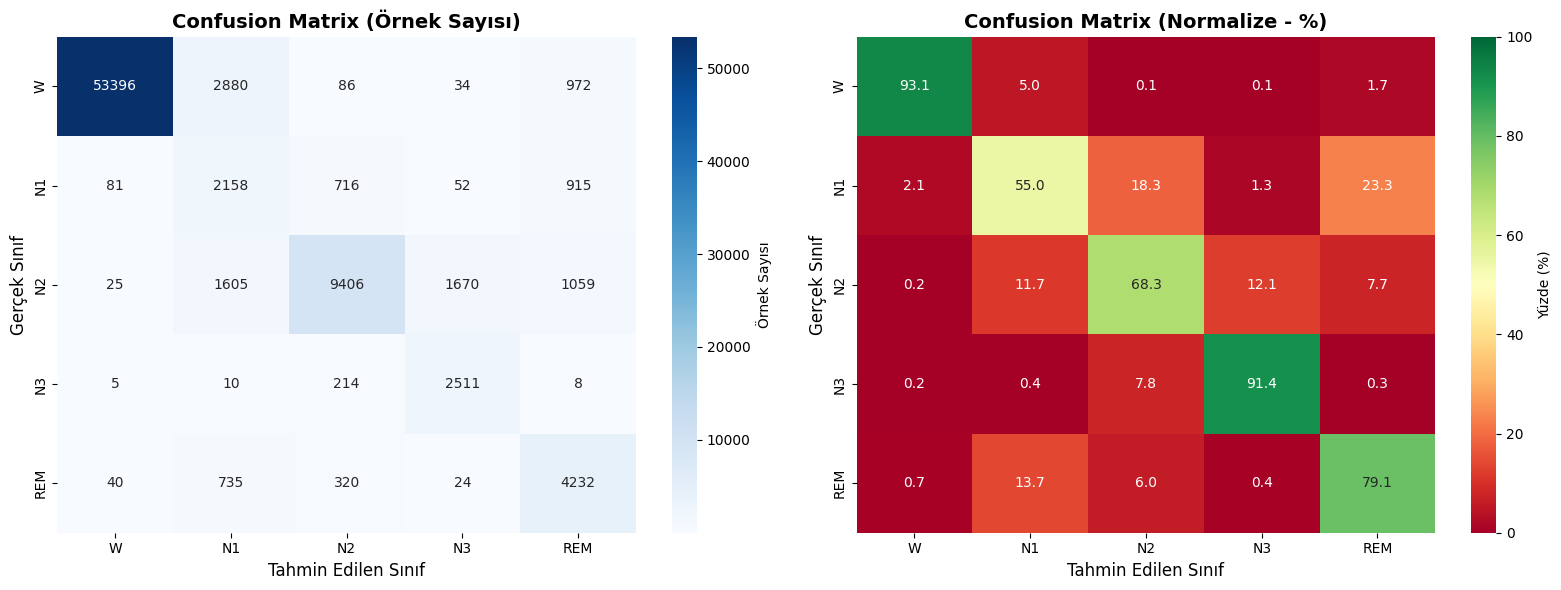


SINIF BAZINDA DETAYLI METRİKLER

SINIF: W (Toplam 57368 örnek)
  Doğru Tahmin (TP):  53396 örnek ( 93.1%)
  Yanlış Tahmin (FN):   3972 örnek (  6.9%)

  Precision:  99.7%  (Tahmin edilen W'lerin kaçı gerçekten W)
  Recall:     93.1%  (Gerçek W'lerin kaçı doğru tahmin edildi)
  F1 Score:   96.3%  (Precision ve Recall'ın harmonik ortalaması)

  Yanlış Sınıflandırmalar:
    →  2880 örnek N1 olarak sınıflandırıldı (  5.0%)
    →   972 örnek REM olarak sınıflandırıldı (  1.7%)
    →    86 örnek N2 olarak sınıflandırıldı (  0.1%)
    →    34 örnek N3 olarak sınıflandırıldı (  0.1%)

  Yanlış Pozitifler (Başka sınıflar W olarak tahmin edildi):
    ←    81 N1 örneği yanlışlıkla W olarak tahmin edildi
    ←    40 REM örneği yanlışlıkla W olarak tahmin edildi
    ←    25 N2 örneği yanlışlıkla W olarak tahmin edildi
    ←     5 N3 örneği yanlışlıkla W olarak tahmin edildi

SINIF: N1 (Toplam 3922 örnek)
  Doğru Tahmin (TP):   2158 örnek ( 55.0%)
  Yanlış Tahmin (FN):   1764 örnek ( 45.0%)

  Prec

In [ ]:
!python train.py